## Importing the relevant packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from arch import arch_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data and Preprocessing

In [2]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [5]:
#del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]
size = int(len(df_comp)*0.80)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

## LLR Test

In [6]:
def LLR_test(mod_1,mod_2,DF=1):
  L1 = mod_1.fit(start_ar_lags = 11).llf
  L2 = mod_2.fit(start_ar_lags = 11).llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR,DF).round(3)
  return p

## Creating Returns

In [7]:
df['returns'] =  df.market_value.pct_change(1)*100

## Creating Squared Returns

In [8]:
df['sq_returns'] =  df.returns.mul(df.returns)

## Returns Vs Squared Returns

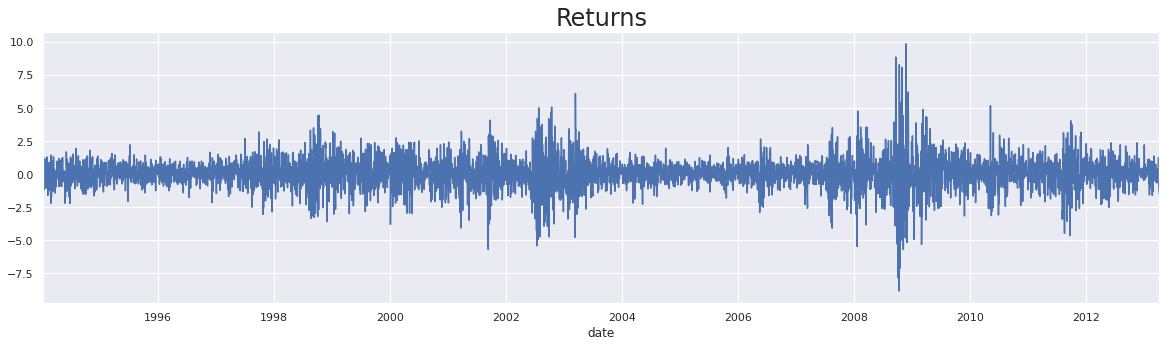

In [9]:
df.returns.plot(figsize=(20,5))
plt.title("Returns",size=24)
plt.show()

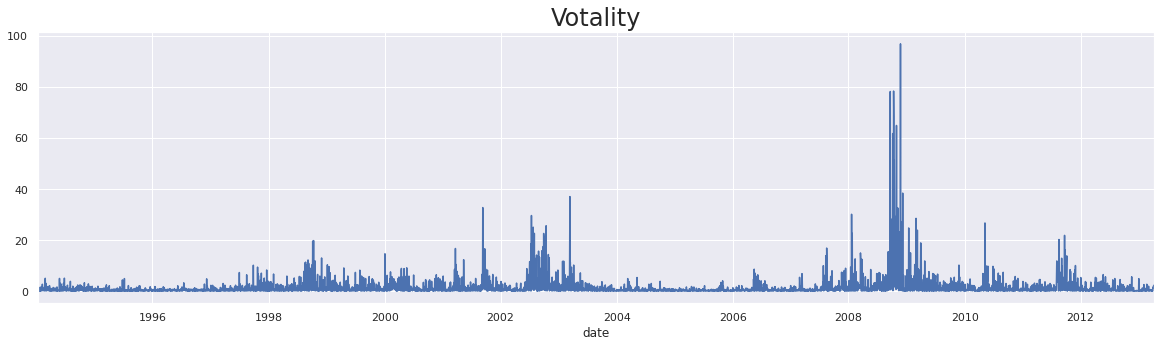

In [10]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Votality",size=24)
plt.show()

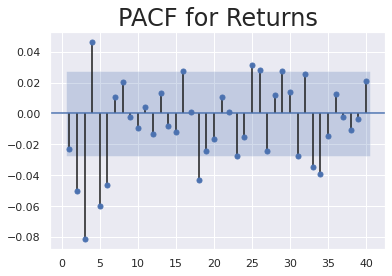

In [11]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha=0.05,  zero= False, method=("ols"))
plt.title("PACF for Returns",size=24)
plt.show()

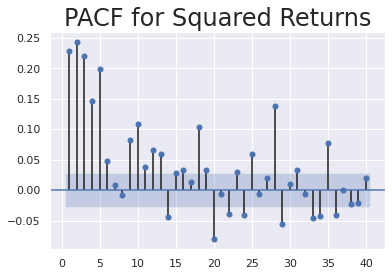

In [12]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha=0.05,  zero= False, method=("ols"))
plt.title("PACF for Squared Returns",size=24)
plt.show() 

## The arch_model() Method

In [13]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 28.8 MB/s 


In [14]:
from arch import arch_model

In [15]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
print(results_arch_1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6579303469.390623
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701100877.2298183
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.030632045198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.035835212278
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712887007633
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.418108744094
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.271338807877
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.879266228052
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.088048943886
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478413694
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.0583674757745
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189882
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.058366189167
Optimization terminated successfully    (Exit mode 0)
        

## The Simple ARCH(1) 

In [16]:
model_arch_1 = arch_model(df.returns[1:], mean= "Constant", vol="ARCH", p=1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782040875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Wed, Nov 16 2022   Df Residuals:                     5019
Time:                        09:38:54   Df Model:                            1
          

In [17]:
model_arch_1 = arch_model(df.returns[1:], mean= "AR", lags = [2,3,6], vol="ARCH", p=1, dist = "ged")
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     52,   Neg. LLF: 17359012.296447493
Iteration:     10,   Func. Count:    100,   Neg. LLF: 7326.620361371647
Iteration:     15,   Func. Count:    142,   Neg. LLF: 7317.121042094248
Iteration:     20,   Func. Count:    186,   Neg. LLF: 7317.118105542874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7317.118092656902
            Iterations: 22
            Function evaluations: 206
            Gradient evaluations: 22
                                 AR - ARCH Model Results                                  
Dep. Variable:                            returns   R-squared:                       0.008
Mean Model:                                    AR   Adj. R-squared:                  0.007
Vol Model:                                   ARCH   Log-Likelihood:               -7317.12
Distribution:      Generalized Error Distribution   AIC:                           14648.2
Method:                        Maximum Likelih

## Higher-Lag ARCH Model

In [18]:
model_arch_2 = arch_model(df.returns[1:], mean= "Constant",  vol="ARCH", p=2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
print(results_arch_2.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Wed, Nov 16 2022   Df Residuals:                     5019
Time:                        09:38:55   Df Model:                            1
           

In [19]:
model_arch_3 = arch_model(df.returns[1:], mean= "Constant",  vol="ARCH", p=3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
print(results_arch_3.summary())

Iteration:      5,   Func. Count:     41,   Neg. LLF: 7496.4079308108885
Iteration:     10,   Func. Count:     75,   Neg. LLF: 7277.050452148393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Wed, Nov 16 2022   Df Residuals:                     5019
Time:         

In [20]:
model_arch_13 = arch_model(df.returns[1:], mean= "Constant",  vol="ARCH", p=13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
print(results_arch_13.summary())

Iteration:      5,   Func. Count:     89,   Neg. LLF: 10011.775468928608
Iteration:     10,   Func. Count:    179,   Neg. LLF: 7470.911405945963
Iteration:     15,   Func. Count:    269,   Neg. LLF: 7087.90751318808
Iteration:     20,   Func. Count:    359,   Neg. LLF: 7068.728949587957
Iteration:     25,   Func. Count:    444,   Neg. LLF: 6984.175063695795
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6984.1750626174235
            Iterations: 27
            Function evaluations: 475
            Gradient evaluations: 27
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6984.18
Distribution:                  Normal   AIC:                           13998.4
Method:            Maximum Likelih